# Лабораторная работа №1. 

Данная лабораторная работа состоит из нескольких блоков. В каждом блоке вам предлагается произвести некоторые манипуляции с данными и сделать некоторые выводы.
* Задавать вопросы можно и нужно.
* Списывать не нужно. Работы, которые были списаны обнуляются.
* Блоки выполняются последовательно и оцениваются отдельно.

##  Part 2. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook. 

In [ ]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

Let's generate our dataset and take a look on it.

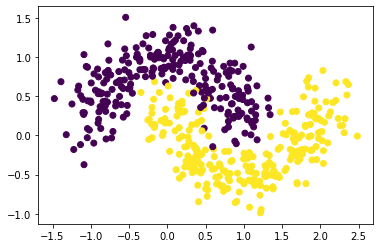

In [ ]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

Logistic Regression


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


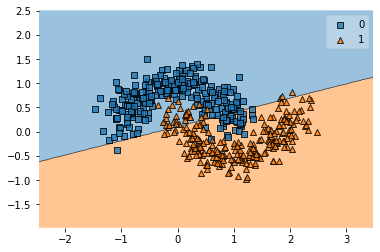

Logistic Regression score = 0.8600921835990013
SVM


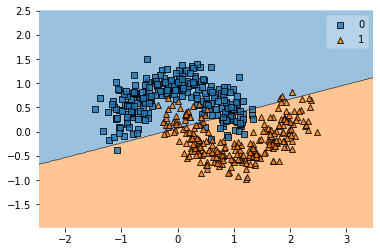

SVM score = 0.8621448579431772


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions


lr = LogisticRegression(penalty = 'l2', C = 1.5) # add some params
svm = SVC(kernel='linear', C = 3) # here too

def plot_decisions(X, y, clf):
  clf.fit(X, y)
  plot_decision_regions(X, y, clf=clf)
  plt.show()
  
names = ['Logistic Regression','SVM']
i = 0  
for clf in [lr, svm]:
  print(str(names[i])) 
  plot_decisions(moons_points, moons_labels, clf)
  print(str(names[i]) + ' score = ' + str(roc_auc_score(clf.predict(moons_points), moons_labels))) 
  i = i + 1
  


## 1.2 Kernel tirck

![keep-calm](https://github.com/ml-mipt/ml-mipt/blob/basic/homeworks/Lab1_Ensembles_and_SVM/imgs/keep-calm.jpg?raw=1)

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters_grid = {
    'C' : np.linspace(0.01, 10, 100),
    'coef0': np.linspace(0.01, 10, 100)
}

parameters_grid_poly = {
    'C' : np.linspace(0.01, 10, 100),
    'degree' : range(2, 9),
    'coef0': np.linspace(0.01, 10, 100)
}

svm_p = SVC(kernel='poly')
svm_r = SVC(kernel='rbf')
svm_s = SVC(kernel='sigmoid')

grid_cv_r = GridSearchCV(svm_r, parameters_grid, scoring = 'roc_auc', n_jobs = -1, cv = 3)
grid_cv_s = GridSearchCV(svm_p, parameters_grid, scoring = 'roc_auc', n_jobs = -1, cv = 3)
grid_cv_p = GridSearchCV(svm_r, parameters_grid_poly, scoring = 'roc_auc', n_jobs = -1, cv = 3)

grid_cv_r.fit(moons_points, moons_labels)
grid_cv_s.fit(moons_points, moons_labels)
grid_cv_p.fit(moons_points, moons_labels)

print('rbf: best params: ' + str(grid_cv_r.best_params_) + ' score: ' + str(grid_cv_r.best_score_))
print('sigmoid: best params: ' + str(grid_cv_s.best_params_) + ' score: ' + str(grid_cv_s.best_score_))
print('poly: best params: ' + str(grid_cv_p.best_params_) + ' score: ' + str(grid_cv_p.best_score_))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


rbf


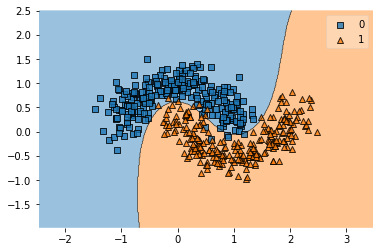

sigmoid


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


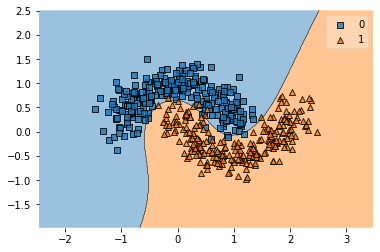

poly


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


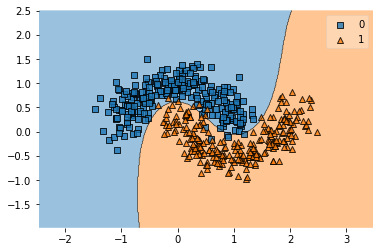

In [ ]:
grid_cv = [grid_cv_r, grid_cv_s, grid_cv_p]
names = ['rbf', 'sigmoid', 'poly']
for g_cv, name in zip(grid_cv, names):
  print(str(name))
  plot_decisions(moons_points, moons_labels, g_cv.best_estimator_)

*   Classification quality increased.
*   That happened because new kernels are better than linear in finding non-linear dependences. It can be easily seen on graphics and  formulas of kernels. So, the decision border is not linear anymore. 
*   $degree = 2$ is the optimal choice according to the grid search. 






## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


 score = 0.9720302099334357


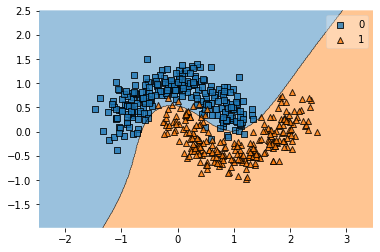

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

lr = LogisticRegression(penalty = 'l2', C = 1.5, max_iter = 5000)
poly = PolynomialFeatures(degree = 3)
pipeline = Pipeline(steps = [('poly', poly), ('regression', lr)])
pipeline.fit(moons_points, moons_labels)
plot_decision_regions(moons_points, moons_labels, clf=pipeline)

print(' score = ' + str(roc_auc_score(pipeline.predict(moons_points), moons_labels)))






*   Quality is a bit worse than SVM.
*   $degree = 3$ It can be seen from the picture of our data: we can see that the decision boundary is the third order curve. It's also easy to chek it: degree increase doesn't change our score, according to the grid search.   



## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

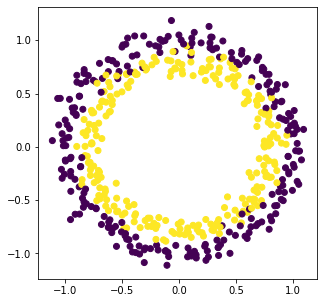

In [ ]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

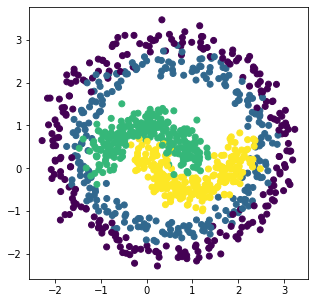

In [ ]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize

labels_bin = label_binarize(labels, classes=[0, 1, 2, 3])

parameters_grid = {
    'estimator__C' : np.linspace(0.01, 10, 20),
}

parameters_grid_poly = {
    'estimator__C' : np.linspace(0.01, 10, 20),
    'estimator__degree' : range(2, 9)
}

parameters_grid_sigmoid = {
    'estimator__C' : np.linspace(0.01, 10, 20),
    'estimator__coef0': np.linspace(0.01, 3, 10)
}



svm_p = OneVsRestClassifier(SVC(kernel='poly', decision_function_shape  = 'ovo'))
svm_r = OneVsRestClassifier(SVC(kernel='rbf', decision_function_shape  = 'ovo'))
svm_s = OneVsRestClassifier(SVC(kernel='sigmoid', decision_function_shape  = 'ovo'))

grid_cv_r = GridSearchCV(svm_r, parameters_grid, scoring = 'accuracy', n_jobs = -1, cv = 3)
grid_cv_s = GridSearchCV(svm_p, parameters_grid_sigmoid, scoring = 'accuracy', n_jobs = -1, cv = 3)
grid_cv_p = GridSearchCV(svm_r, parameters_grid_poly, scoring = 'accuracy', n_jobs = -1, cv = 3)

grid_cv_r.fit(points, labels_bin)
grid_cv_s.fit(points, labels_bin)
grid_cv_p.fit(points, labels_bin)

print('rbf: best params: ' + str(grid_cv_r.best_params_) + ' score: ' + str(grid_cv_r.best_score_))
print('sigmoid: best params: ' + str(grid_cv_s.best_params_) + ' score: ' + str(grid_cv_s.best_score_))
print('poly: best params: ' + str(grid_cv_p.best_params_) + ' score: ' + str(grid_cv_p.best_score_))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default 

rbf: best params: {'estimator__C': 10.0} score: 0.86
sigmoid: best params: {'estimator__C': 0.5357894736842106, 'estimator__coef0': 0.6744444444444445} score: 0.599
poly: best params: {'estimator__C': 10.0, 'estimator__degree': 2} score: 0.86


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default 

In [ ]:
svm_p.get_params().keys()

dict_keys(['estimator__C', 'estimator__cache_size', 'estimator__class_weight', 'estimator__coef0', 'estimator__decision_function_shape', 'estimator__degree', 'estimator__gamma', 'estimator__kernel', 'estimator__max_iter', 'estimator__probability', 'estimator__random_state', 'estimator__shrinking', 'estimator__tol', 'estimator__verbose', 'estimator', 'n_jobs'])

rbf


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default 

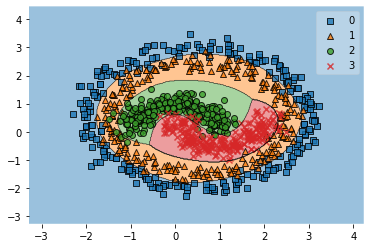

sigmoid


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default 

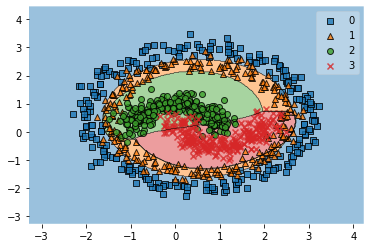

poly


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default 

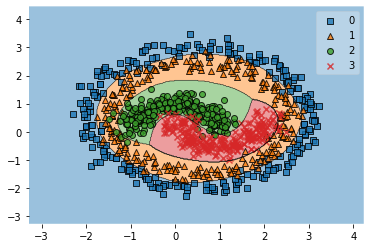

In [ ]:
grid_cv = [grid_cv_r, grid_cv_s, grid_cv_p]
names = ['rbf', 'sigmoid', 'poly']
for g_cv, name in zip(grid_cv, names):
  print(str(name))
  plot_decisions(points, labels, g_cv.best_estimator_)

In [ ]:
poly = PolynomialFeatures()
lr = LogisticRegression(multi_class='multinomial', solver = 'saga', max_iter = 5000)
pipeline = Pipeline(steps = [('poly', poly), ('regression', lr)])

In [ ]:
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'poly', 'regression', 'poly__degree', 'poly__include_bias', 'poly__interaction_only', 'poly__order', 'regression__C', 'regression__class_weight', 'regression__dual', 'regression__fit_intercept', 'regression__intercept_scaling', 'regression__l1_ratio', 'regression__max_iter', 'regression__multi_class', 'regression__n_jobs', 'regression__penalty', 'regression__random_state', 'regression__solver', 'regression__tol', 'regression__verbose', 'regression__warm_start'])

In [ ]:
parameters_grid = {
    'poly__degree' : range(2, 5),
    'regression__C' : np.linspace(0.05, 5, 10),
    'regression__penalty' : ['l1', 'l2']
}

grid_cv = GridSearchCV(pipeline, parameters_grid, scoring = 'accuracy', n_jobs = -1, cv = 3)

grid_cv.fit(points, labels)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('poly',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('regression',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                   

{'poly__degree': 4, 'regression__C': 4.45, 'regression__penalty': 'l1'}
0.924


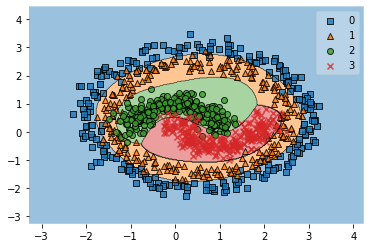

In [ ]:
print(grid_cv.best_params_)
print(grid_cv.best_score_)
plot_decisions(points, labels, grid_cv.best_estimator_)

*   Linear regression with features of the $degree = 4$ showed the best result.
*   All models, except sigmoid SVM (had a small problem with $3$rd class), managed to fing this hard dependence in data.



